<a href="https://colab.research.google.com/github/OlgaZukova/22.9.1/blob/master/Correlation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/W5_L5_Labs2_netflix_titles.csv")

print("Dataset shape:", df.shape)

df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Correlation matrix:
               year_added  duration_num
year_added      1.000000      0.029345
duration_num    0.029345      1.000000


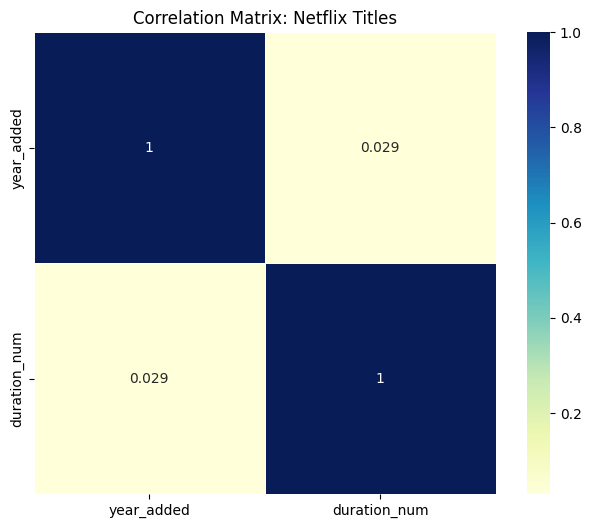

In [ ]:
# Data cleaning

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

df['year_added'] = df['date_added'].dt.year

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


# Select numeric columns for correlation

corr_df = df[['year_added', 'duration_num']].dropna()


# Correlation matrix

our_correlation = corr_df.corr()

print("\nCorrelation matrix:\n", our_correlation)


# Heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(our_correlation, annot=True, cmap="YlGnBu", linewidths=0.5, square=True)

plt.title("Correlation Matrix: Netflix Titles")

plt.show()

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import requests

import zipfile

import io

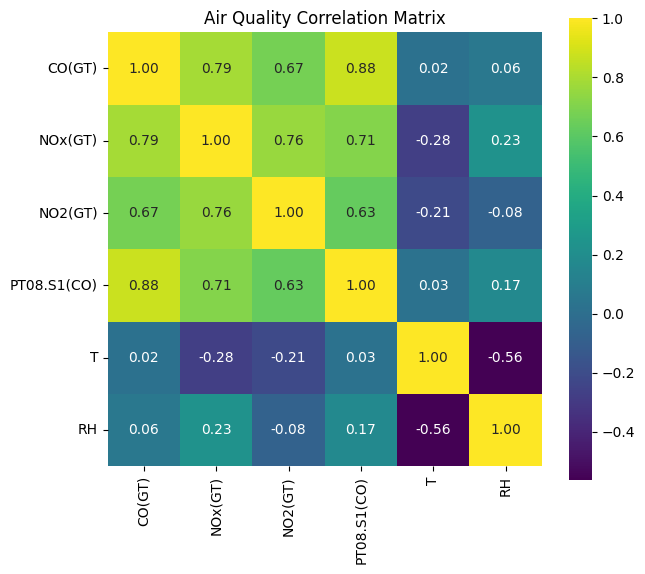

In [ ]:
# Updated URL for the Air Quality dataset from the new UCI repository
url = 'https://archive.ics.uci.edu/static/public/360/air+quality.zip'

# Download the zip file
response = requests.get(url)
response.raise_for_status() # Raise an exception for bad status codes

# Extract the desired CSV file from the zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Find the correct CSV file name within the zip archive
    # You might need to inspect the zip contents if 'AirQualityUCI.csv' is not the name
    csv_file_name = 'AirQualityUCI.csv'
    with z.open(csv_file_name) as f:
        # Hypothesis
        # Read the CSV file from the extracted content
        df = pd.read_csv(f, sep=';', decimal=',', on_bad_lines='skip')

# Now that we are outside the 'with' block, process the dataframe
num = df[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S1(CO)', 'T', 'RH']].replace(-200, pd.NA).dropna()

corr = num.corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title("Air Quality Correlation Matrix")
plt.show()

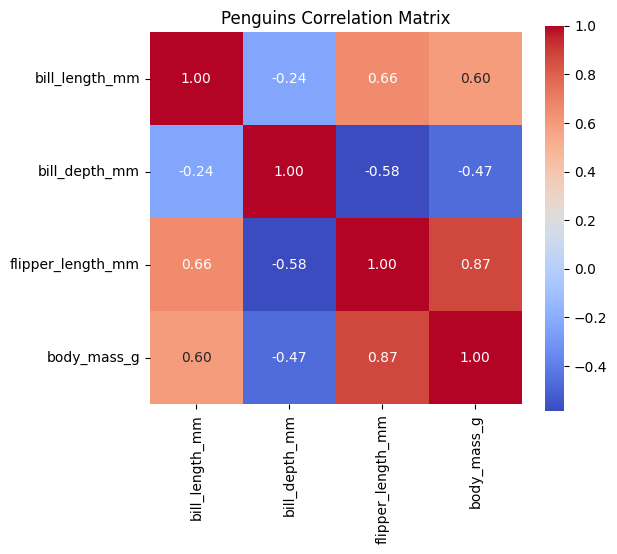

In [ ]:
import seaborn as sns

import pandas as pd

import matplotlib.pyplot as plt


# Download dataset (rough link)

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')


numeric = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].dropna()

corr = numeric.corr()


plt.figure(figsize=(6,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Penguins Correlation Matrix")

plt.show()